In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
dog-and-cat-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip dog-and-cat-classification-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5499.jpg  
  inflating: PetImages/Dog/55.jpg    
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def extract_features(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            return None  # Skip unreadable images
        image = cv2.resize(image, (128, 128))
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                            [0, 180, 0, 256, 0, 256])
        return cv2.normalize(hist, hist).flatten()
    except:
        return None

features = []
labels = []

base_dir = "/content/PetImages"
for category in ["Cat", "Dog"]:
    folder = os.path.join(base_dir, category)
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            path = os.path.join(folder, filename)
            feature = extract_features(path)
            if feature is not None:
                features.append(feature)
                labels.append(category)

# Convert to arrays
X = np.array(features)
le = LabelEncoder()
y = le.fit_transform(labels)  # Cat=0, Dog=1



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,353 (642.00 KB)

 Trainable params: 164,353 (642.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6177 - loss: 0.6428 - val_accuracy: 0.6497 - val_loss: 0.6249
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6719 - loss: 0.5925 - val_accuracy: 0.6571 - val_loss: 0.6210
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7017 - loss: 0.5662 - val_accuracy: 0.6599 - val_loss: 0.6238
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7341 - loss: 0.5251 - val_accuracy: 0.6619 - val_loss: 0.6192
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7766 - loss: 0.4741 - val_accuracy: 0.6641 - val_loss: 0.6486
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7920 - loss: 0.4387 - val_accuracy: 0.6561 - val_loss: 0.7007
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8225 - loss: 0.3889 - val_accuracy: 0.6585 - val_loss: 0.7605
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8527 - loss: 0.3374 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6403 - loss: 1.0037
Test Accuracy: 0.64


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()


NameError: name 'history' is not defined

In [ ]:
def predict_image(image_path, model, label_encoder):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or unreadable.")
        return
    image = cv2.resize(image, (128, 128))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    feature = cv2.normalize(hist, hist).flatten().reshape(1, -1)

    prediction = model.predict(feature)[0][0]
    label = "Dog" if prediction >= 0.5 else "Cat"
    confidence = prediction if prediction >= 0.5 else 1 - prediction

    print(f"Prediction: {label} ({confidence*100:.2f}% confidence)")

    # Show the image (Optional)
    import matplotlib.pyplot as plt
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction: Cat (99.94% confidence)


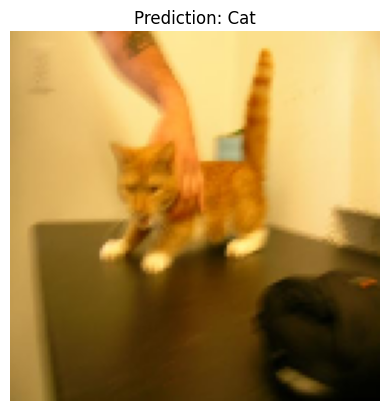

In [ ]:
predict_image("/content/PetImages/Cat/0.jpg", model, le)


again start

In [ ]:
# Image and File Handling
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ML Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Deep Learning
import tensorflow as tf
from tensorflow.keras import models, layers


In [ ]:
# Define base directory
base_dir = "/content/PetImages"
cat_dir = os.path.join(base_dir, "Cat")
dog_dir = os.path.join(base_dir, "Dog")

# Count total images in each folder
cat_images = [f for f in os.listdir(cat_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
dog_images = [f for f in os.listdir(dog_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Number of cat images: {len(cat_images)}")
print(f"Number of dog images: {len(dog_images)}")
print(f"Total images: {len(cat_images) + len(dog_images)}")


Number of cat images: 12499
Number of dog images: 12499
Total images: 24998


In [ ]:
def check_sample_images(image_list, folder_path, label="Cat"):
    print(f"Checking sample {label} images...")
    valid_images = 0
    for i in range(5):
        img_path = os.path.join(folder_path, image_list[i])
        img = cv2.imread(img_path)
        if img is not None:
            print(f"{label} image {i+1}: OK")
            valid_images += 1
        else:
            print(f"{label} image {i+1}: CORRUPT or UNREADABLE")
    return valid_images

check_sample_images(cat_images, cat_dir, "Cat")
check_sample_images(dog_images, dog_dir, "Dog")


Checking sample Cat images...
Cat image 1: OK
Cat image 2: OK
Cat image 3: OK
Cat image 4: OK
Cat image 5: OK
Checking sample Dog images...
Dog image 1: OK
Dog image 2: OK
Dog image 3: OK
Dog image 4: OK
Dog image 5: OK


5

In [ ]:
# Resize and check image validity
def load_and_preprocess_images(folder, label):
    images = []
    labels = []
    for img_name in os.listdir(folder):
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        img_path = os.path.join(folder, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (128, 128))  # Resize to fixed size
            images.append(img)
            labels.append(label)
        except:
            continue
    return images, labels

# Load both classes
cat_images, cat_labels = load_and_preprocess_images(cat_dir, "Cat")
dog_images, dog_labels = load_and_preprocess_images(dog_dir, "Dog")

# Combine
all_images = np.array(cat_images + dog_images)
all_labels = np.array(cat_labels + dog_labels)

print(f"Total preprocessed images: {len(all_images)}")
print(f"Image shape: {all_images[0].shape}")


Total preprocessed images: 24946
Image shape: (128, 128, 3)


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Shuffle the data before slicing
indices = np.arange(len(all_images))
np.random.shuffle(indices)

# Take first 5000 samples
subset_indices = indices[:5000]
subset_images = [all_images[i] for i in subset_indices]
subset_labels = [all_labels[i] for i in subset_indices]

# Convert to arrays
subset_images = np.array(subset_images)
subset_labels = np.array(subset_labels)

# Normalize images
normalized_images = subset_images / 255.0

# Encode labels
le = LabelEncoder()
encoded_labels = le.fit_transform(subset_labels)

# Check shape
print(f"Subset image data shape: {normalized_images.shape}")
print(f"Subset label shape: {encoded_labels.shape}")
print(f"Unique labels: {le.classes_}")



Subset image data shape: (5000, 128, 128, 3)
Subset label shape: (5000,)
Unique labels: ['Cat' 'Dog']


In [ ]:
# Flatten each image: (128, 128, 3) → (49152,)
flattened_images = normalized_images.reshape(len(normalized_images), -1).astype('float32')

# Check shape
print(f"Flattened image shape: {flattened_images.shape}")


Flattened image shape: (5000, 49152)


In [ ]:
print(flattened_images.shape)


(5000, 49152)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    flattened_images, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

# Confirm shapes
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training set shape: (4000, 49152)
Testing set shape: (1000, 49152)
Training labels shape: (4000,)
Testing labels shape: (1000,)


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# # Build the Sequential Model
# model = Sequential()

# # Input layer (with flattened image shape)
# model.add(Dense(512, input_dim=49152, activation='relu'))  # 1st hidden layer with 512 neurons
# model.add(Dropout(0.5))  # Dropout for regularization

# # 2nd hidden layer
# model.add(Dense(256, activation='relu'))  # 2nd hidden layer with 256 neurons
# model.add(Dropout(0.5))

# # Output layer (binary classification)
# model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification (0 = Cat, 1 = Dog)

# # Compile the model
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# # Summary of the model architecture
# model.summary()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

input_shape = X_train.shape[1]  # 49152

model = Sequential([
    Dense(1024, activation='relu', input_shape=(input_shape,)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1024)           │    50,332,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,996,225 (194.54 MB)

 Trainable params: 50,992,641 (194.52 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=10,         # Number of epochs (training cycles)
    batch_size=64,     # Batch size (samples per gradient update)
    validation_data=(X_test, y_test),  # Evaluate on the test set after each epoch
    verbose=2          # Show detailed progress for each epoch
)


Epoch 1/10
125/125 - 140s - 1s/step - accuracy: 0.5465 - loss: 0.8317 - val_accuracy: 0.5380 - val_loss: 1.1647
Epoch 2/10
125/125 - 129s - 1s/step - accuracy: 0.5735 - loss: 0.7340 - val_accuracy: 0.5880 - val_loss: 0.6854
Epoch 3/10
125/125 - 139s - 1s/step - accuracy: 0.5900 - loss: 0.7047 - val_accuracy: 0.5740 - val_loss: 0.6973
Epoch 4/10
125/125 - 143s - 1s/step - accuracy: 0.6072 - loss: 0.6836 - val_accuracy: 0.5870 - val_loss: 0.6714
Epoch 5/10
125/125 - 124s - 996ms/step - accuracy: 0.6170 - loss: 0.6707 - val_accuracy: 0.6000 - val_loss: 0.6712
Epoch 6/10
125/125 - 144s - 1s/step - accuracy: 0.6273 - loss: 0.6597 - val_accuracy: 0.5700 - val_loss: 0.6733
Epoch 7/10
125/125 - 127s - 1s/step - accuracy: 0.6467 - loss: 0.6326 - val_accuracy: 0.5570 - val_loss: 0.7240
Epoch 8/10
125/125 - 148s - 1s/step - accuracy: 0.6497 - loss: 0.6340 - val_accuracy: 0.5980 - val_loss: 0.6851
Epoch 9/10
125/125 - 134s - 1s/step - accuracy: 0.6545 - loss: 0.6191 - val_accuracy: 0.5790 - val_lo

In [ ]:
 from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Get predictions as probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Classification Report (gives all the above + more)
report = classification_report(y_test, y_pred, target_names=['Cat', 'Dog'])

# Print all results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:\n", report)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
Accuracy: 0.5920
Precision: 0.5819
Recall: 0.6540
F1 Score: 0.6158

Confusion Matrix:
[[265 235]
 [173 327]]

Classification Report:
               precision    recall  f1-score   support

         Cat       0.61      0.53      0.57       500
         Dog       0.58      0.65      0.62       500

    accuracy                           0.59      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.59      0.59      0.59      1000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step
Confusion Matrix:
 [[265 235]
 [173 327]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57       500
           1       0.58      0.65      0.62       500

    accuracy                           0.59      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.59      0.59      0.59      1000



32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step


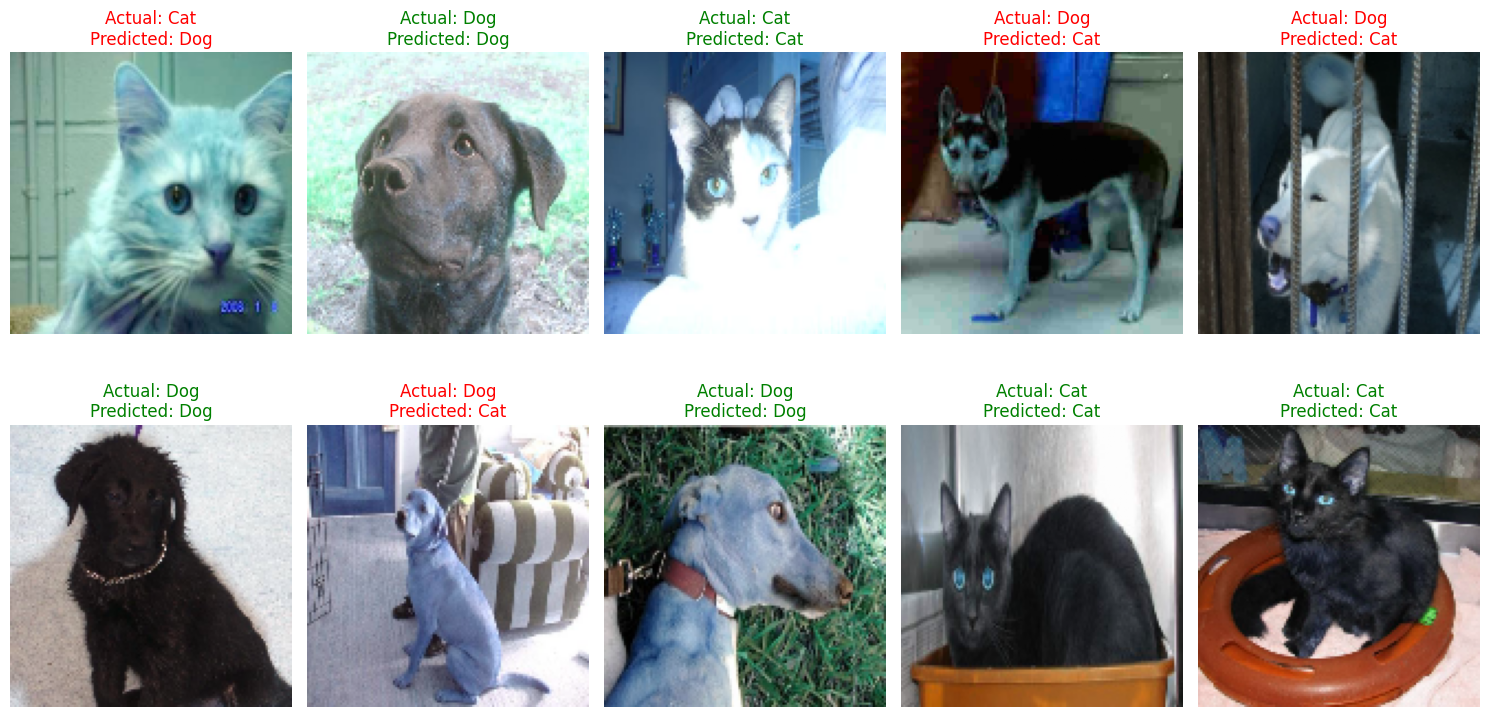

In [ ]:
import matplotlib.pyplot as plt

# Number of images to show
num_images = 10

# Get predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Label map
label_map = {0: 'Cat', 1: 'Dog'}

# Reshape images back
reshaped_images = X_test.reshape(-1, 128, 128, 3)

# Display
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(reshaped_images[i])
    plt.axis('off')
    actual = label_map[y_test[i]]
    predicted = label_map[y_pred[i]]
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Actual: {actual}\nPredicted: {predicted}", color=color)
plt.tight_layout()
plt.show()



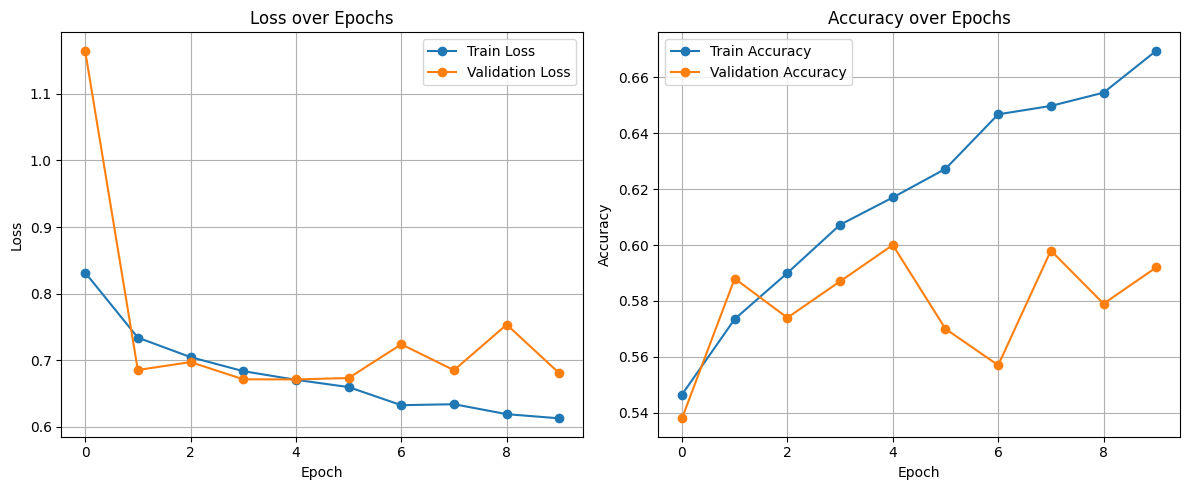

In [ ]:
# Training history is stored in 'history' from model.fit()
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


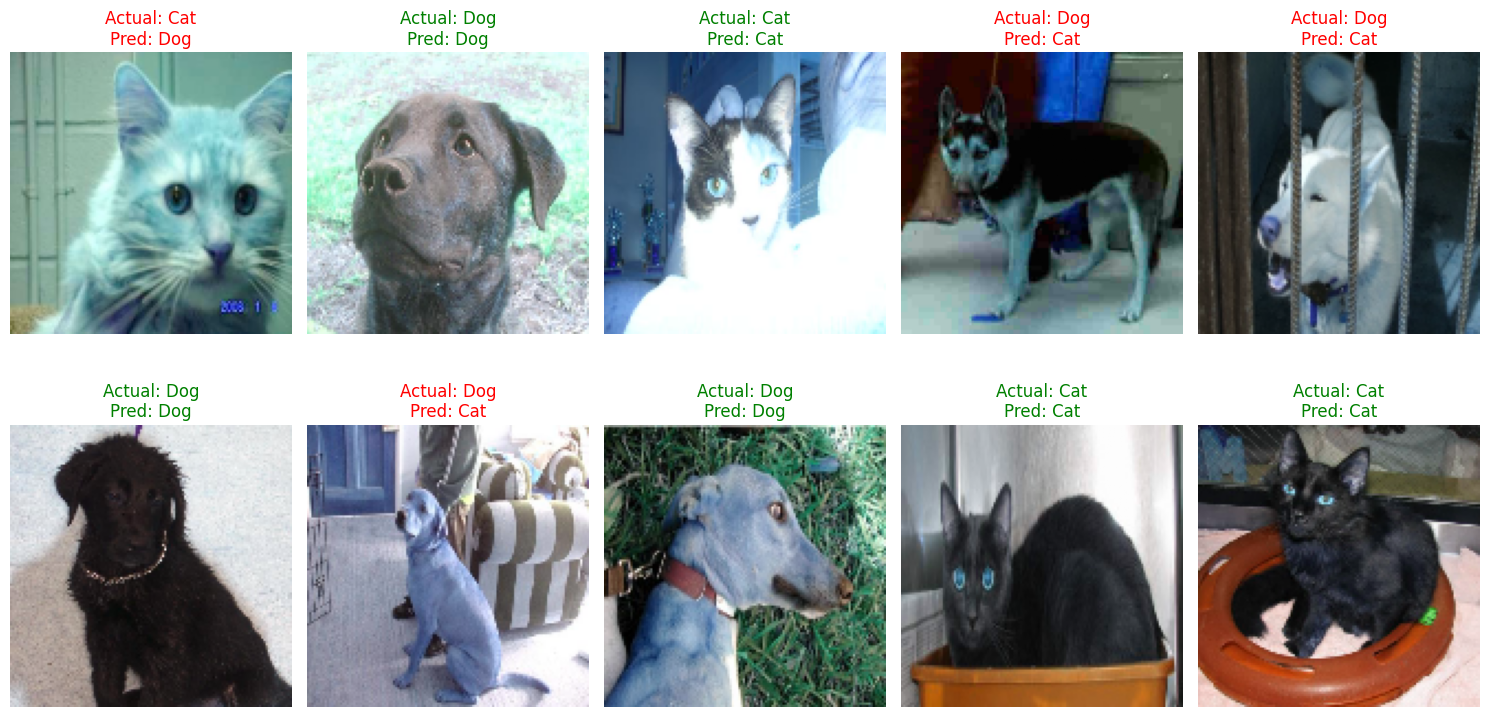

In [ ]:
import matplotlib.pyplot as plt

# Get predictions (probabilities → class labels)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Reshape test images back to original shape for display
reshaped_images = X_test.reshape(-1, 128, 128, 3)

# Map numeric labels to string labels
label_map = {0: 'Cat', 1: 'Dog'}

# Show 10 test images with predictions
num_images = 10
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(reshaped_images[i])
    plt.axis('off')
    actual = label_map[y_test[i]]
    predicted = label_map[y_pred[i]]
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Actual: {actual}\nPred: {predicted}", color=color)
plt.tight_layout()
plt.show()


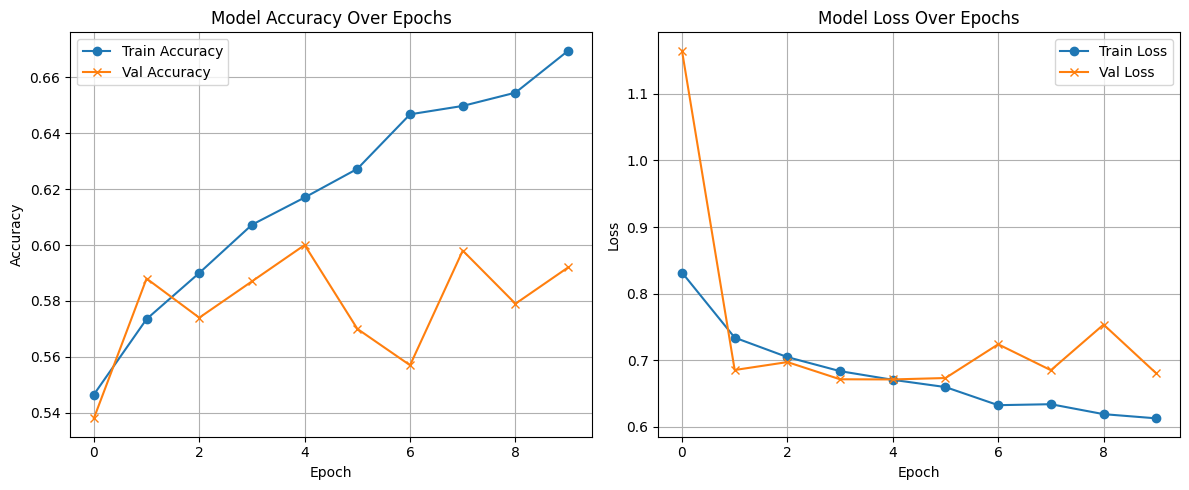

In [ ]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Input dimension
input_shape = X_train.shape[1]  # should be 49152

# Build the improved Model 2
model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,300,993 (96.52 MB)

 Trainable params: 25,299,457 (96.51 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.2, verbose=1)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 501ms/step - accuracy: 0.5700 - loss: 0.8532 - val_accuracy: 0.5238 - val_loss: 1.1790
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 501ms/step - accuracy: 0.5762 - loss: 0.7249 - val_accuracy: 0.5663 - val_loss: 0.7521
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 500ms/step - accuracy: 0.6274 - loss: 0.6738 - val_accuracy: 0.5825 - val_loss: 0.7133
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 516ms/step - accuracy: 0.6413 - loss: 0.6495 - val_accuracy: 0.5775 - val_loss: 0.7048
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 527ms/step - accuracy: 0.6578 - loss: 0.6371 - val_accuracy: 0.5625 - val_loss: 0.7275
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 501ms/step - accuracy: 0.6980 - loss: 0.5832 - val_accuracy: 0.5900 - val_loss: 0.6978
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 522ms/step - accuracy: 0.6971 - loss: 0.5860 - val_accuracy: 0.5938 - val_loss: 0.7059
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 520ms/step - accuracy: 0.7018 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6125 - loss: 0.7246
Test Accuracy: 0.6040


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype("int32").reshape(-1)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred, target_names=['Cat', 'Dog'])

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


Accuracy: 0.6040
Precision: 0.6070
Recall: 0.5900
F1 Score: 0.5984

Confusion Matrix:
[[309 191]
 [205 295]]

Classification Report:
              precision    recall  f1-score   support

         Cat       0.60      0.62      0.61       500
         Dog       0.61      0.59      0.60       500

    accuracy                           0.60      1000
   macro avg       0.60      0.60      0.60      1000
weighted avg       0.60      0.60      0.60      1000



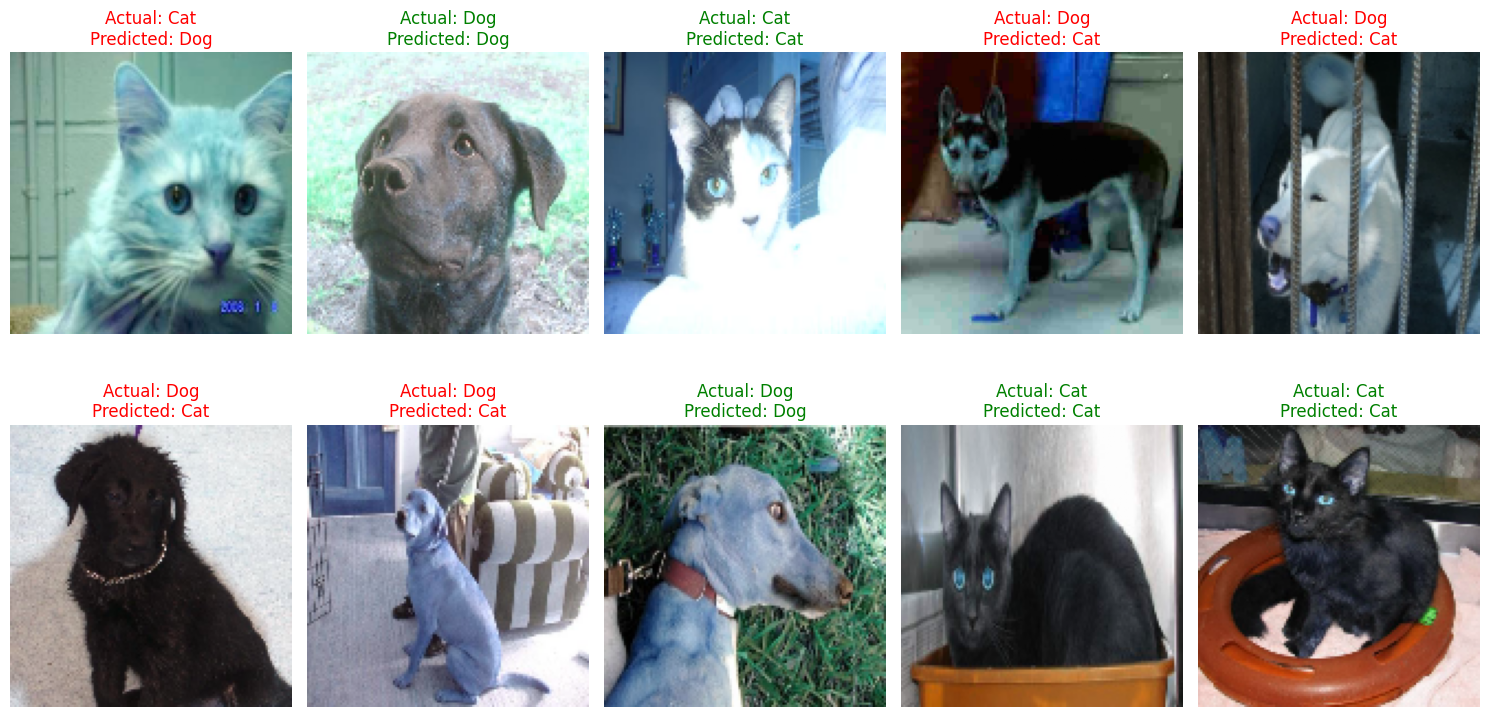

In [ ]:
import matplotlib.pyplot as plt

# Number of images to show
num_images = 10

# Original input images before flattening
X_test_images = X_test.reshape((-1, 128, 128, 3))

# Map labels
label_map = {0: 'Cat', 1: 'Dog'}

# Display images with predictions
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_images[i])
    plt.axis('off')
    actual = label_map[y_test[i]]
    predicted = label_map[y_pred[i]]
    color = 'green' if actual == predicted else 'red'
    plt.title(f"Actual: {actual}\nPredicted: {predicted}", color=color)
plt.tight_layout()
plt.show()
